In [1]:
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow

In [2]:
pics = [
    'CG-IS-001 Box 09-10 (24.65 to 29.50)split.png',
    'CG-IS-005 Box 03-04 (5.40 to 11.30)split.png',
    'CH-IU-013 Box 01-02 (0.00 to 5.60)split.png'
]

## Examine the specs of the image

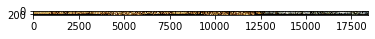

In [3]:
img1 = imread(os.path.join('imgs', pics[0]))
imshow(img1)

In [4]:
print(f'dims = {img1.shape}, max value = {img1.max()}, min value = {img1.min()}')

dims = (221, 18402, 3), max value = 1.0, min value = 0.0


### Make sure color sequence is R -> G -> B

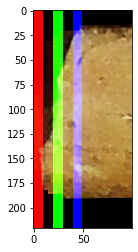

In [5]:
img1_head = img1[:, :100, :].copy()
img1_head[:, :10, 0] = 1.0
img1_head[:, 20:30, 1] = 1.0
img1_head[:, 40:50, 2] = 1.0
imshow(img1_head)

In [6]:
h, w, c = img1.shape
res = np.empty((0, 3), float)
for i in range(w):
    col_slice = img1[:, i, :]
    all_color = col_slice.sum(axis = 1)
    min_step = 1 / 255
    valid_idx = np.argwhere(all_color >= min_step).ravel()
    valid_range = range(valid_idx[0], valid_idx[-1] + 1)
    p = np.average(col_slice[valid_range], axis = 0)
    res = np.vstack((p, res))

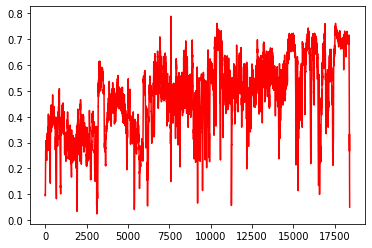

In [8]:
plt.figure()
plt.plot(res[:, 0], c = 'r')
plt.show()